In [79]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas

In [13]:
numbat = pd.read_csv("2019_numbat_formatted.csv")

# Data operations here

## Most used station Mon-Thurs (inwards)

In [15]:
numbat[ (numbat['day'] == "MTT") & (numbat['dir'] == 'IN') & (numbat['Mode'] == 'LU')].sort_values(by="Total", ascending=False).head(10)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,Late
244,LU,747,WLOu,Waterloo,Station entry / exit,2019,MTT,IN,149888,4141,63134,32773,32755,12284,4801
128,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2019,MTT,IN,138167,2451,28824,42605,38648,18935,6704
239,LU,741,VICu,Victoria,Station entry / exit,2019,MTT,IN,132807,3458,32730,39593,35913,14166,6947
139,LU,635,LONu,London Bridge,Station entry / exit,2019,MTT,IN,121129,3869,28931,33421,34404,14636,5868
169,LU,669,OXCu,Oxford Circus,Station entry / exit,2019,MTT,IN,114563,432,2960,31326,42556,27884,9405
11,LU,513,BNKu,Bank and Monument,Station entry / exit,2019,MTT,IN,113772,823,9148,25796,53641,18984,5380
138,LU,634,LSTu,Liverpool Street,Station entry / exit,2019,MTT,IN,111518,2997,24381,29213,36071,13813,5043
218,LU,719,SFDu,Stratford,Station entry / exit,2019,MTT,IN,97218,6410,21417,28106,25544,12806,2935
36,LU,852,CWFu,Canary Wharf,Station entry / exit,2019,MTT,IN,81830,1216,8443,16487,38917,13927,2840
170,LU,670,PADu,Paddington TfL,Station entry / exit,2019,MTT,IN,79826,1933,22141,25265,21208,7291,1988


In [16]:
numbat.columns.values

array(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM_Peak', 'Inter_Peak', 'PM_Peak', 'Evening',
       'Late'], dtype=object)

In [24]:
MTT_inwards = numbat[ (numbat['day'] == "MTT") & (numbat['dir'] == 'IN') & (numbat['Mode'] == 'LU')].sort_values(by="Total", ascending=False).head(20)

In [25]:
MTT_inwards_melt = pd.melt(MTT_inwards, id_vars = ['Station','year','day','dir','Total'], value_vars = ['Early', 'AM_Peak', 'Inter_Peak', 'PM_Peak', 'Evening',
       'Late'])

In [21]:
MTT_inwards_melt.sample(3)

,Station,year,day,dir,Total,variable,value
1587,Wembley Park,2019,MTT,IN,24558,Late,806
745,Southwark,2019,MTT,IN,25731,Inter_Peak,6562
344,Euston Square,2019,MTT,IN,25170,AM_Peak,4790


<AxesSubplot:xlabel='variable', ylabel='value'>

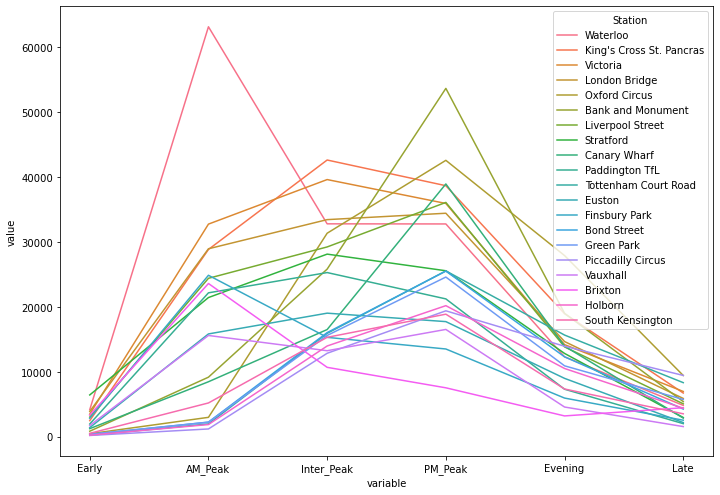

In [32]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.lineplot(data=MTT_inwards_melt, x= 'variable', y='value', hue= 'Station')

## Most used station Mon-Thurs (outwards)

In [9]:
numbat[ (numbat['day'] == "MTT") & (numbat['dir'] == 'OUT') & (numbat['Mode'] == 'LU')].sort_values(by="Total", ascending=False).head(10)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,Late
507,LU,741,VICu,Victoria,Station entry / exit,2019,MTT,OUT,139851,3522,34364,36032,40786,17673,7474
396,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2019,MTT,OUT,137722,3583,33425,42120,37599,14451,6544
512,LU,747,WLOu,Waterloo,Station entry / exit,2019,MTT,OUT,130330,4194,19944,26738,51333,20025,8096
437,LU,669,OXCu,Oxford Circus,Station entry / exit,2019,MTT,OUT,130177,3389,48060,47848,23134,6516,1230
407,LU,635,LONu,London Bridge,Station entry / exit,2019,MTT,OUT,118095,2600,32068,31887,31860,13817,5863
406,LU,634,LSTu,Liverpool Street,Station entry / exit,2019,MTT,OUT,117156,3144,34436,28920,33209,12650,4797
279,LU,513,BNKu,Bank and Monument,Station entry / exit,2019,MTT,OUT,114346,3762,61140,28006,15635,4562,1241
486,LU,719,SFDu,Stratford,Station entry / exit,2019,MTT,OUT,98508,2136,18795,30006,29756,12301,5514
304,LU,852,CWFu,Canary Wharf,Station entry / exit,2019,MTT,OUT,86880,4258,48652,15880,10003,5401,2686
438,LU,670,PADu,Paddington TfL,Station entry / exit,2019,MTT,OUT,78290,1825,18866,21603,22343,9817,3836


In [10]:
numbat[ (numbat['dir'] == 'IN') & (numbat['Mode'] == 'LU')].sort_values(by="Total", ascending=False).head(10)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,Late
244,LU,747,WLOu,Waterloo,Station entry / exit,2019,MTT,IN,149888,4141,63134,32773,32755,12284,4801
664,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2019,FRI,IN,149862,2147,22449,48207,41090,22940,13029
780,LU,747,WLOu,Waterloo,Station entry / exit,2019,FRI,IN,146239,3655,53482,34695,32513,13751,8143
775,LU,741,VICu,Victoria,Station entry / exit,2019,FRI,IN,141521,3017,28897,44743,36541,17065,11258
128,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2019,MTT,IN,138167,2451,28824,42605,38648,18935,6704
239,LU,741,VICu,Victoria,Station entry / exit,2019,MTT,IN,132807,3458,32730,39593,35913,14166,6947
675,LU,635,LONu,London Bridge,Station entry / exit,2019,FRI,IN,127157,3286,25019,36077,34437,16330,12008
705,LU,669,OXCu,Oxford Circus,Station entry / exit,2019,FRI,IN,124882,486,2973,33830,41854,27647,18092
139,LU,635,LONu,London Bridge,Station entry / exit,2019,MTT,IN,121129,3869,28931,33421,34404,14636,5868
1200,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2019,SAT,IN,116987,1100,10534,55728,24351,15065,10209


In [36]:
len(numbat.Station.unique())

415

In [40]:
numbat.Mode.unique()

array(['LU', 'LO', 'DLR', 'TfLRail'], dtype=object)

In [38]:
station_coo = pd.read_csv("Stations_20180921.csv")

In [41]:
numbat.sample(1)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,Late
439,LU,671,PRYu,Park Royal,Station entry / exit,2019,MTT,OUT,3539,194,1488,676,692,346,143


In [39]:
station_coo.sample(3)

,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y
297,297,357,Walthamstow Queens Road,537018,188807,NaN,London Overground,3,-0.022255,51.580971
414,414,412,Wellesley Road,532506,165769,NaN,Tramlink,5,-0.095979,51.374999
32,32,40,Lancaster Gate,526711,180773,Central,London Underground,1,-0.173844,51.511178


In [44]:
numbat_coord = numbat.merge(station_coo, left_on = "Station", right_on = "NAME")
numbat_coord.sample(3)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,...,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y
2164,LO,719,SFDu,Stratford,LO boarding / alighting,2019,SUN,IN,13077,0,...,300,379,Stratford,538521,184409,NaN,London Overground,3,-0.002307,51.541079
1861,LU,694,RSQu,Russell Square,Station entry / exit,2019,SAT,OUT,15064,149,...,29,18,Russell Square,530229,182128,Piccadilly,London Underground,1,-0.122662,51.522551
1558,LU,655,NFDu,Northfields,Station entry / exit,2019,SUN,IN,3217,152,...,228,218,Northfields,517197,179206,Piccadilly,London Underground,3,-0.311410,51.499146


In [48]:
numbat_coord.loc[numbat_coord.x.isnull()]

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,...,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y


In [49]:
numbat_coord.columns.values

array(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM_Peak', 'Inter_Peak', 'PM_Peak', 'Evening',
       'Late', 'FID', 'OBJECTID', 'NAME', 'EASTING', 'NORTHING', 'LINES',
       'NETWORK', 'Zone', 'x', 'y'], dtype=object)

In [52]:
numbat_coord = numbat_coord[['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'Zone', 'year', 'day', 'dir',
       'Total', 'Early', 'AM_Peak', 'Inter_Peak', 'PM_Peak', 'Evening',
       'Late', 'LINES',  'x', 'y']]

In [54]:
#numbat_coord.to_csv("2019_numbat_coords.csv")

# Add direction in and out tgt for degree centrality

In [72]:
d = {'Total':'sum', 'Early':'sum', 'AM_Peak':'sum', 'Inter_Peak':'sum', 'PM_Peak':'sum', 'Evening':'sum',
       'Late':'sum'}
numbat_agg = numbat.groupby(['Mode','Station','year','day']).agg(d).reset_index()
numbat_agg

,Mode,Station,year,day,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,Late
0,DLR,Abbey Road,2019,FRI,3942,241,826,1177,945,500,253
1,DLR,Abbey Road,2019,MTT,3858,235,899,1116,946,458,204
2,DLR,Abbey Road,2019,SAT,2948,118,332,1190,650,390,268
3,DLR,Abbey Road,2019,SUN,2256,12,242,978,510,349,165
4,DLR,All Saints,2019,FRI,6888,157,1316,2403,1637,891,484
...,...,...,...,...,...,...,...,...,...,...,...
1787,TfLRail,Stratford,2019,SUN,58126,1214,4277,28391,15196,6368,2680
1788,TfLRail,West Ealing,2019,FRI,5099,229,1529,1037,1384,679,241
1789,TfLRail,West Ealing,2019,MTT,5464,251,1509,892,1822,892,98
1790,TfLRail,West Ealing,2019,SAT,2741,70,348,1129,645,399,150


In [73]:
#checking
numbat.loc[ (numbat['Station'] == "Abbey Road")]

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,Late
3040,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,MTT,IN,1945,169,585,603,385,142,61
3085,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,MTT,OUT,1913,66,314,513,561,316,143
3130,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,FRI,IN,2013,172,544,642,408,169,78
3175,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,FRI,OUT,1929,69,282,535,537,331,175
3220,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,SAT,IN,1486,81,215,650,293,160,87
3265,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,SAT,OUT,1462,37,117,540,357,230,181
3310,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,SUN,IN,1122,6,156,555,213,128,64
3355,DLR,750,ABRd,Abbey Road,Station entry / exit,2019,SUN,OUT,1134,6,86,423,297,221,101


In [74]:
numbat_coord = numbat_agg.merge(station_coo, left_on = "Station", right_on = "NAME")
numbat_coord.sample(3)

,Mode,Station,year,day,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,...,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y
809,LU,Blackfriars,2019,MTT,55851,1289,18552,12500,17045,5016,...,1,79,Blackfriars,531694,180893,"District, Circle",London Underground,1,-0.102020,51.511114
638,LO,Walthamstow Central,2019,SAT,14526,680,1678,5191,3105,2011,...,223,202,Walthamstow Central,537176,188994,Victoria,London Underground,3,-0.019895,51.582616
1220,LU,Liverpool Street,2019,MTT,228674,6141,58817,58133,69280,26463,...,64,144,Liverpool Street,533202,181646,NaN,London Overground,1,-0.080014,51.517528


In [70]:
numbat_coord.loc[numbat_coord.x.isnull()]

,Station,year,day,Total,Early,AM_Peak,Inter_Peak,PM_Peak,Evening,Late,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y


In [76]:
numbat_coord.columns.values

array(['Mode', 'Station', 'year', 'day', 'Total', 'Early', 'AM_Peak',
       'Inter_Peak', 'PM_Peak', 'Evening', 'Late', 'FID', 'OBJECTID',
       'NAME', 'EASTING', 'NORTHING', 'LINES', 'NETWORK', 'Zone', 'x',
       'y'], dtype=object)

In [77]:
numbat_coord = numbat_coord[['Mode', 'Station', 'Zone', 'year', 'day',
       'Total', 'Early', 'AM_Peak', 'Inter_Peak', 'PM_Peak', 'Evening',
       'Late', 'LINES',  'x', 'y']]

In [78]:
numbat_coord.to_csv("2019_numbat_coords.csv")

In [ ]:
#rename cols 'Early': 1, 'AM_Peak': 2, 'Inter_Peak': 3, 'PM_Peak': 4, 'Evening': 5,'Late': 6
#MTT_inwards_melt = pd.melt(MTT_inwards, id_vars = ['Station','year','day','dir','Total'], value_vars = ['Early', 'AM_Peak', 'Inter_Peak', 'PM_Peak', 'Evening',
       'Late'])

In [100]:
# rename column names for melting
r = ['Mode', 'Station', 'Zone', 'Year', 'Day',
       'Total', '1', '2', '3', '4', '5',
       '6', 'Line',  'Longitude', 'Latitude']

numbat_coord.columns = r

In [102]:
numbat_melted = pd.melt(numbat_coord, id_vars = ['Mode', 'Station', 'Zone','Year','Day', 'Total', 'Line', 'Longitude', 'Latitude'], value_vars = ['1', '2', '3', '4', '5', '6'])

In [107]:
numbat_melted.sample(3)

,Mode,Station,Zone,Year,Day,Total,Line,Longitude,Latitude,variable,value
9875,LU,Leytonstone,4,2019,SUN,17235,Central,0.009808,51.567815,6,991
7302,LO,Kensington (Olympia),2,2019,SAT,6131,District,-0.208533,51.497225,5,635
6039,LU,Bromley-by-Bow,3,2019,SUN,6929,"District, Hammersmith & City",-0.009841,51.524250,4,1690


In [109]:
numbat_melted.columns.values

array(['Mode', 'Station', 'Zone', 'Year', 'Day', 'Total', 'Line',
       'Longitude', 'Latitude', 'variable', 'value'], dtype=object)

In [110]:
# rename column names for melting
r = ['Mode', 'Station', 'Zone', 'Year', 'Day', 'Total', 'Line',
       'Longitude', 'Latitude', 'Hour_zone', 'hour_count']

numbat_melted.columns = r

In [111]:
numbat_melted.loc[numbat_melted['Station'] == "Leytonstone"]

,Mode,Station,Zone,Year,Day,Total,Line,Longitude,Latitude,Hour_zone,hour_count
1212,LU,Leytonstone,4,2019,FRI,32965,Central,0.009808,51.567815,1,1865
1213,LU,Leytonstone,4,2019,MTT,31782,Central,0.009808,51.567815,1,1982
1214,LU,Leytonstone,4,2019,SAT,24564,Central,0.009808,51.567815,1,877
1215,LU,Leytonstone,4,2019,SUN,17235,Central,0.009808,51.567815,1,470
2944,LU,Leytonstone,4,2019,FRI,32965,Central,0.009808,51.567815,2,7936
2945,LU,Leytonstone,4,2019,MTT,31782,Central,0.009808,51.567815,2,8567
2946,LU,Leytonstone,4,2019,SAT,24564,Central,0.009808,51.567815,2,2926
2947,LU,Leytonstone,4,2019,SUN,17235,Central,0.009808,51.567815,2,1915
4676,LU,Leytonstone,4,2019,FRI,32965,Central,0.009808,51.567815,3,7546
4677,LU,Leytonstone,4,2019,MTT,31782,Central,0.009808,51.567815,3,6959


In [112]:
numbat_melted.to_csv("2019_numbat_melted.csv")

# Geopandas plot

In [113]:
#try plotting
coords = pd.read_csv("2019_numbat_melted.csv")

In [114]:
gdf = geopandas.GeoDataFrame(
    coords, geometry=geopandas.points_from_xy(coords.Longitude, coords.Latitude), crs="EPSG:4326")

<AxesSubplot:>

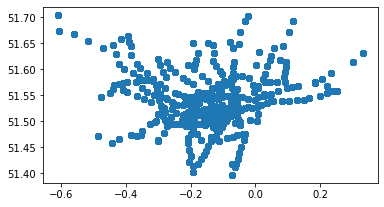

In [115]:
gdf.plot()

In [116]:
gdf.to_file("numbat_agg2.geojson", driver='GeoJSON')

In [90]:
coords.Total.describe()

count      1732.000000
mean      23972.892610
std       37809.634919
min          88.000000
25%        5240.000000
50%       11153.000000
75%       25803.500000
max      305233.000000
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total'>

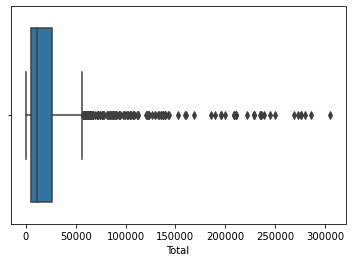

In [95]:
sns.boxplot(data = coords, x='Total')